In [298]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# データセットを確認

In [299]:
dataset = load_iris() # あやめの花のデータセット
columns_name = dataset.feature_names

In [300]:
x = dataset.data # 説明変数
t = dataset.target

In [301]:
np.unique(t) # 0, 1, 2の3種類の花

x.shape # 150個のデータ、4種類の特徴量

t.shape # 150個のデータ

(150,)

# 機械学習を行う

In [302]:
from sklearn.model_selection import train_test_split

In [303]:
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

In [304]:
x_train.shape # 105個のデータ、4種類の特徴量

(105, 4)

# 決定着を用いて行う

In [305]:
from sklearn.tree import DecisionTreeClassifier

In [306]:
model = DecisionTreeClassifier(random_state=0)

In [307]:
model.fit(x_train, t_train)

DecisionTreeClassifier(random_state=0)

In [308]:
print(f'train score: {model.score(x_train, t_train)}') # 学習済みモデルの精度を確認
print(f'test score: {model.score(x_test, t_test)}') # 学習時に使っていないデータで精度を確認

train score: 1.0
test score: 0.9777777777777777


In [309]:
model.predict(x_test) # 予測結果

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [310]:
import graphviz
from sklearn.tree import export_graphviz

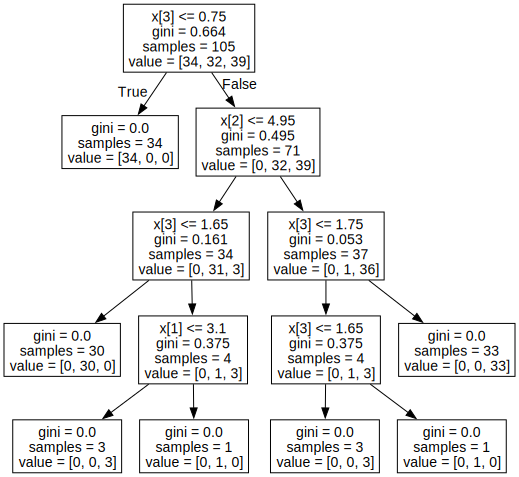

In [311]:
dot_data = export_graphviz(model)
graph_tree = graphviz.Source(dot_data)
display(graph_tree)

In [312]:
feature_importance = model.feature_importances_
feature_importance

array([0.        , 0.02150464, 0.39766951, 0.58082584])

In [313]:
y = columns_name
width = feature_importance

<BarContainer object of 4 artists>

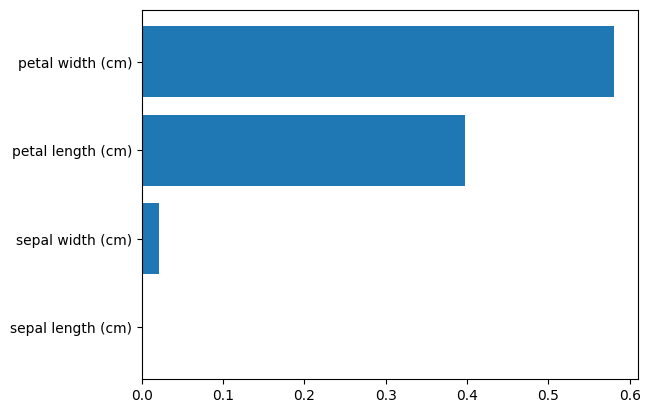

In [314]:
plt.barh(y=y, width=width)

#  サポートベクトルマシン


In [315]:
# SVM
from sklearn.svm import SVC

In [316]:

model = SVC()

In [317]:
model.fit(x_train, t_train)

SVC()

In [318]:
print(f'train score: {model.score(x_train, t_train)}') # 学習済みモデルの精度を確認
print(f'test score: {model.score(x_test, t_test)}') # 学習時に使っていないデータで精度を確認

train score: 0.9714285714285714
test score: 0.9777777777777777


距離を用いる時にスケールを統一する方法がある？
標準化

値から平均を引いて標準偏差で割る

In [319]:
from sklearn.preprocessing import StandardScaler

In [320]:
scaler = StandardScaler()

In [321]:
scaler.fit(x_train) # 学習用データで標準化

StandardScaler()

In [322]:
x_train_std = scaler.transform(x_train) # 訓練データの標準化
x_test_std = scaler.transform(x_test) # テストデータの標準化

In [323]:
x_train.mean()

3.4985714285714287

In [324]:
round(x_train_std.mean()) # 平均が0になっている

0

In [325]:
round(x_train_std.std()) # 標準偏差が1になっている

1

In [326]:
model_std = SVC(C=5.0, gamma=0.1)

In [327]:
model_std.fit(x_train_std, t_train)

SVC(C=5.0, gamma=0.1)

In [328]:
print(f'train score: {model.score(x_train, t_train)}') # 学習済みモデルの精度を確認
print(f'test score: {model.score(x_test, t_test)}') # 学習時に使っていないデータで精度を確認
print("======================")
print(f'train score: {model_std.score(x_train_std, t_train)}') # 学習済みモデルの精度を確認
print(f'test score: {model_std.score(x_test_std, t_test)}') # 学習時に使っていないデータで精度を確認

train score: 0.9714285714285714
test score: 0.9777777777777777
train score: 0.9714285714285714
test score: 0.9777777777777777
